In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
data = os.path.join("data","spam.tsv")

In [5]:
df = pd.read_csv(data,sep='\t')
df.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [10]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

/home/namtran/anaconda3/envs/nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

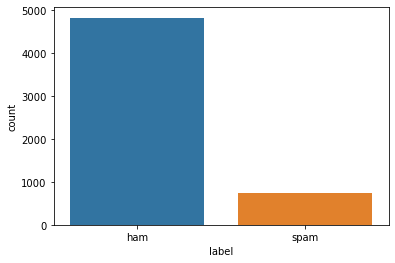

In [11]:
import seaborn as sns
sns.countplot(df["label"]) 

### THIS DATA IS HIGHLY SKEWED AND IMBALANCE 

In [12]:
spam = df[df["label"]=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [18]:
ham = df[df["label"]=='ham']
ham = ham.sample(spam.shape[0])
print(ham.shape)

(747, 4)


In [22]:
data = pd.concat([ham,spam],axis=0,ignore_index=True)

In [46]:
data.head()

,label,message,length,punct
0,ham,Ok u can take me shopping when u get paid =D,44,1
1,ham,Hmmm ... And imagine after you've come home fr...,175,7
2,ham,Prepare to be pounded every night...,36,3
3,ham,"Sorry, I'll call later",22,2
4,ham,And several to you sir.,23,1


### Exploratory Data Analysis


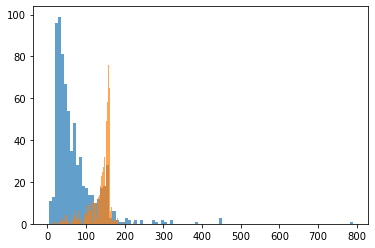

In [48]:
plt.hist(data[data["label"]=='ham']['length'],bins =100 , alpha=0.7 )
plt.hist(data[data["label"]=='spam']['length'],bins =100 , alpha=0.7 )
plt.show()

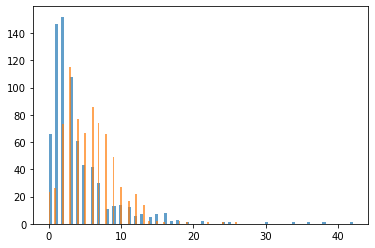

In [49]:
plt.hist(data[data["label"]=='ham']['punct'],bins =100 , alpha=0.7 )
plt.hist(data[data["label"]=='spam']['punct'],bins =100 , alpha=0.7 )
plt.show()

### Data Preparation



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=22,shuffle=True,stratify=data['label'])

In [56]:
print(X_train.shape)
print(X_test.shape)

(1045,)
(449,)


In [57]:
vectorizer = TfidfVectorizer()

In [58]:
X_train = vectorizer.fit_transform(X_train)

In [60]:
X_train.shape

(1045, 3696)

### Pipeline


In [76]:
clf = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',RandomForestClassifier(n_estimators=10,n_jobs=1))
])

In [77]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_estimators=10, n_jobs=1))])

In [78]:
y_pred = clf.predict(X_test)

In [79]:
accuracy_score(y_pred,y_test)

0.9175946547884187

In [80]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       0.99      0.87      0.92       255
        spam       0.85      0.98      0.91       194

    accuracy                           0.92       449
   macro avg       0.92      0.93      0.92       449
weighted avg       0.93      0.92      0.92       449



In [81]:
confusion_matrix(y_pred,y_test)

array([[221,  34],
       [  3, 191]])

In [84]:
clf.predict(["Congratulation , you have won free tickets to the USA this summer"])

array(['spam'], dtype=object)